# Econ 212: Problem Set 3

In [1]:
from fredapi import Fred
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fred = Fred(api_key = 'f6fa4f544be19c2ea791e9a3240470bf')

## Problem 1: Seignorage and inflation

### Part (b) - ADD GRAPHS WITH RECESSION BANDS

In [3]:
def est_param(start_date, end_date, monthly_end_date):
    
    ## get and process data
    #######################
    
    # money
    M_monthly = fred.get_series('M2SL', observation_start = start_date, observation_end = monthly_end_date)
    M = np.mean(np.reshape(M_monthly, (3, len(M_monthly) // 3), order = 'F'), axis = 0)

    # prices
    P = fred.get_series('PCECTPI', observation_start = start_date, observation_end = end_date)

    # interest rates
    i_monthly = fred.get_series('FEDFUNDS', observation_start = start_date, observation_end = monthly_end_date)
    i = np.mean(np.reshape(i_monthly, (3, len(i_monthly) // 3), order = 'F'), axis = 0)

    # consumption
    C = fred.get_series('PCEC', observation_start = start_date, observation_end = end_date)
    
    # real money balances
    m = M / P

    # real consumption
    c = C / P
    
    ## fit linear regression to estimate preferences parameters
    ###########################################################
    
    x = np.array([np.log(c), np.log((1 / i) + 1)]).T
    y = np.array(np.log(m))

    model = LinearRegression().fit(x, y)

    print('intercept:', round(model.intercept_, 4), 
          '\ncoefficients:', [round(coef, 4) for coef in model.coef_])
    
    gamma = 1 / model.coef_[1]
    phi = np.exp(gamma * model.intercept_)
    sigma = gamma * model.coef_[0]

    print('gamma:', round(gamma, 4), 
          '\nphi:', round(phi, 4), 
          '\nsigma:', round(sigma, 4))
    
    return M_monthly, M, P, i_monthly, i, C, m, c

In [4]:
M_monthly, M, P, i_monthly, i, C, m, c = est_param('1959-01-01', '2022-10-01', '2022-12-01')

intercept: 0.3001 
coefficients: [0.8829, 0.114]
gamma: 8.7712 
phi: 13.9037 
sigma: 7.744


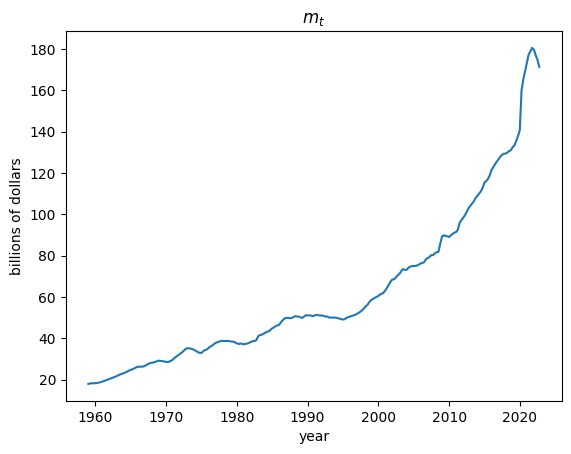

In [5]:
dates = pd.DataFrame(m).index

plt.plot(dates, m)
plt.title('$m_t$')
plt.xlabel('year')
plt.ylabel('billions of dollars')
plt.show()

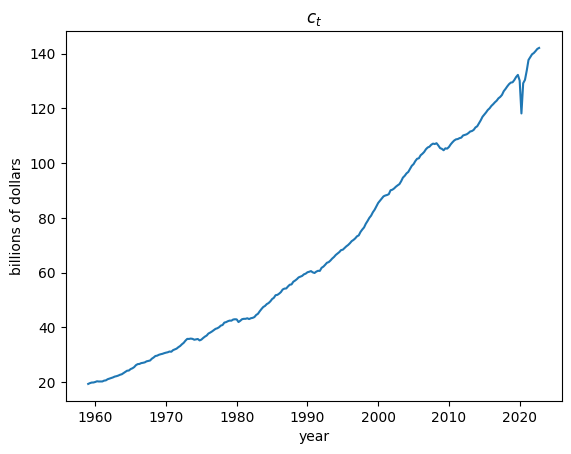

In [6]:
plt.plot(dates, c)
plt.title('$c_t$')
plt.xlabel('year')
plt.ylabel('billions of dollars')
plt.show()

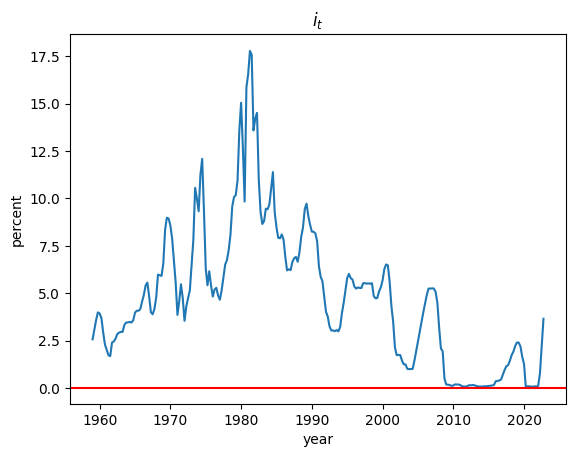

In [7]:
plt.plot(dates, i)
plt.title('$i_t$')
plt.xlabel('year')
plt.ylabel('percent')
plt.axhline(y = 0, color = 'red')
plt.show()

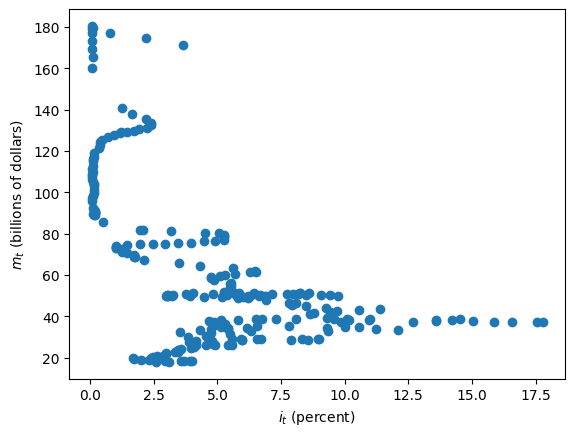

In [8]:
plt.scatter(i, m)
plt.xlabel(r'$i_t$ (percent)')
plt.ylabel(r'$m_t$ (billions of dollars)')
plt.show()

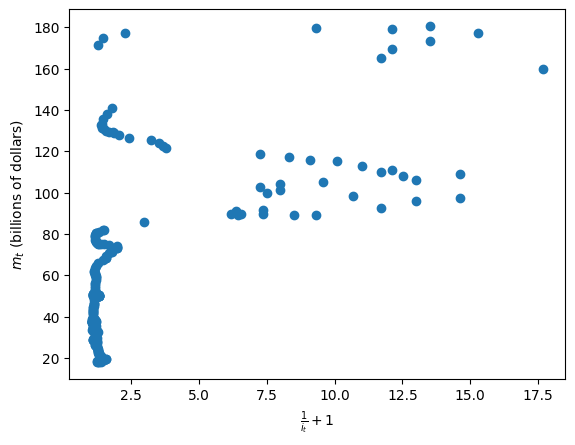

In [9]:
plt.scatter(1 / i + 1, m)
plt.xlabel('$\\frac{1}{i_t}+1$')
plt.ylabel(r'$m_t$ (billions of dollars)')
plt.show()

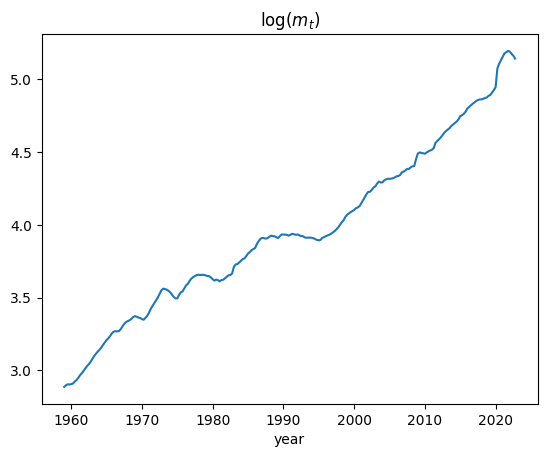

In [10]:
plt.plot(dates, np.log(m))
plt.title('$\\log(m_t)$')
plt.xlabel('year')
plt.show()

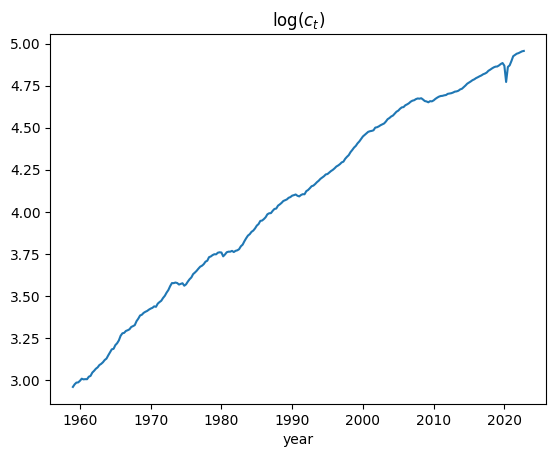

In [11]:
plt.plot(dates, np.log(c))
plt.title('$\\log(c_t)$')
plt.xlabel('year')
plt.show()

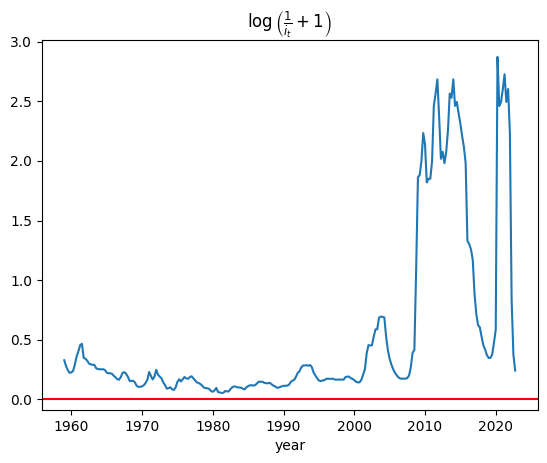

In [12]:
plt.plot(dates, np.log(1 / i + 1))
plt.title('$\\log\\left(\\frac{1}{i_t}+1\\right)$')
plt.xlabel('year')
plt.axhline(y = 0, color = 'red')
plt.show()

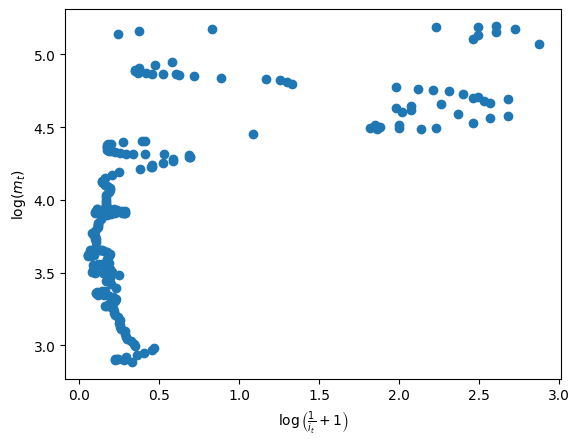

In [13]:
plt.scatter(np.log(1 / i + 1), np.log(m))
plt.xlabel('$\\log\\left(\\frac{1}{i_t}+1\\right)$')
plt.ylabel('$\\log(m_t)$')
plt.show()

In [14]:
est_param('1960-01-01', '1969-10-01', '1969-12-01');

intercept: -0.5723 
coefficients: [1.1595, 0.145]
gamma: 6.8985 
phi: 0.0193 
sigma: 7.9988


In [15]:
est_param('1970-01-01', '1979-10-01', '1979-12-01');

intercept: 0.1707 
coefficients: [0.9269, 0.2606]
gamma: 3.8379 
phi: 1.9256 
sigma: 3.5575


In [16]:
est_param('1980-01-01', '1989-10-01', '1989-12-01');

intercept: 0.4507 
coefficients: [0.8284, 0.9471]
gamma: 1.0558 
phi: 1.6093 
sigma: 0.8746


In [17]:
est_param('1990-01-01', '1999-10-01', '1999-12-01');

intercept: 2.2286 
coefficients: [0.4128, -0.1223]
gamma: -8.1786 
phi: 0.0 
sigma: -3.3761


In [18]:
est_param('2000-01-01', '2009-10-01', '2009-12-01');

intercept: -1.003 
coefficients: [1.15, 0.0757]
gamma: 13.2093 
phi: 0.0 
sigma: 15.1908


In [19]:
est_param('2010-01-01', '2019-10-01', '2019-12-01');

intercept: -6.5928 
coefficients: [2.3599, 0.04]
gamma: 24.9868 
phi: 0.0 
sigma: 58.9663


### Part (c)

In [20]:
# convert M and P to annual frequency
M_annual = np.mean(np.reshape(M, (4, len(M) // 4), order = 'F'), axis = 0)
P_annual = np.mean(np.reshape(P, (4, len(P) // 4), order = 'F'), axis = 0)

# calculate seignorage
s = np.diff(M_annual) / P_annual[1:]

# calculate change in real money balances
m_annual = np.mean(np.reshape(m, (4, len(m) // 4), order = 'F'), axis = 0)
s1 = np.diff(m_annual)

# calculate 'inflation tax' term
s2 = s - s1

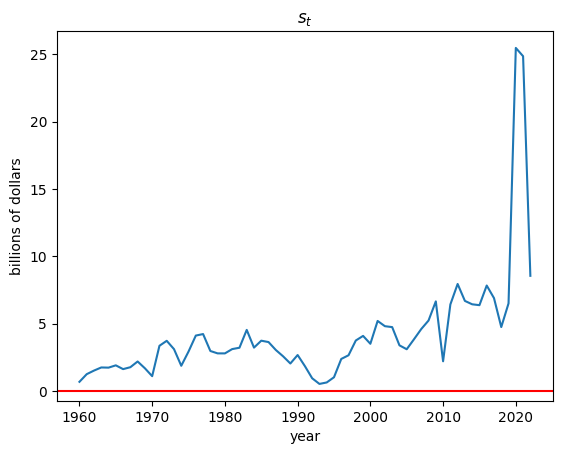

In [21]:
# date range is now from 1960 to 2022
plt.plot(range(1960, 2023), s)
plt.title('$s_t$')
plt.xlabel('year')
plt.ylabel('billions of dollars')
plt.axhline(y = 0, color = 'red')
plt.show()

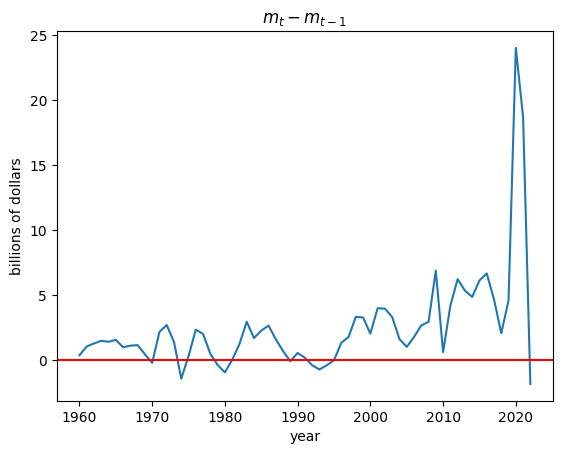

In [22]:
plt.plot(range(1960, 2023), s1)
plt.title('$m_t-m_{t-1}$')
plt.xlabel('year')
plt.ylabel('billions of dollars')
plt.axhline(y = 0, color = 'red')
plt.show()

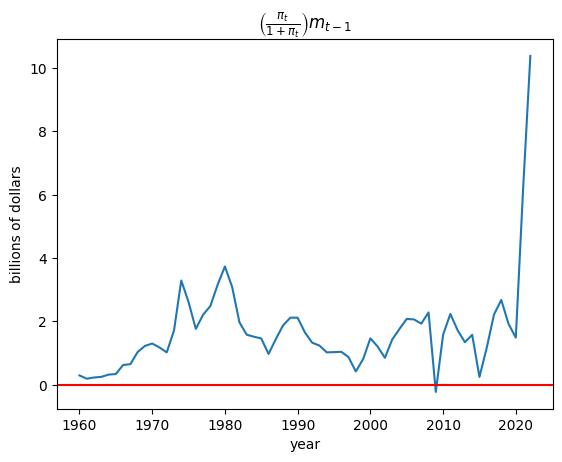

In [23]:
plt.plot(range(1960, 2023), s2)
plt.title('$\\left(\\frac{\\pi_t}{1+\\pi_t}\\right)m_{t-1}$')
plt.xlabel('year')
plt.ylabel('billions of dollars')
plt.axhline(y = 0, color = 'red')
plt.show()

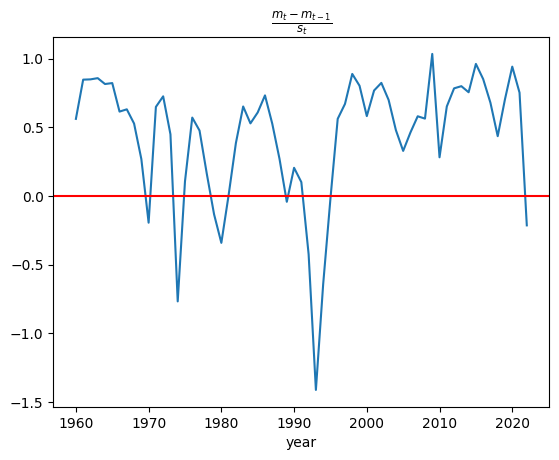

In [24]:
# see what percentage of seignorage has been the change in real money balances
plt.plot(range(1960, 2023), s1 / s)
plt.title('$\\frac{m_t-m_{t-1}}{s_t}$')
plt.xlabel('year')
plt.axhline(y = 0, color = 'red')
plt.show()

## Problem 2: SVAR impulse response to monetary shocks